# Visualizations of L2HMC Experiments
This notebook aggregates data from previous experiments in order create nice plots

## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys
sys.path.append('/content/drive/MyDrive/repos/l2hmc')

Mounted at /content/drive


In [2]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline
%load_ext autoreload
%autoreload 2

TensorFlow 1.x selected.


In [3]:
from utils.func_utils import accept, jacobian, autocovariance, get_log_likelihood, \
    get_data, binarize, normal_kl, acl_spectrum, ESS
from utils.distributions import Gaussian, GMM, GaussianFunnel, gen_ring
from utils.layers import Linear, Sequential, Zip, Parallel, ScaleTanh
from utils.dynamics import Dynamics
from utils.sampler import propose
from utils.notebook_utils import get_hmc_samples

loading in data from earlier trials

In [21]:
l2hmc5 = np.load("/content/drive/MyDrive/repos/l2hmc/data/width5.npy",allow_pickle=True)
rotation5 = np.load("/content/drive/MyDrive/repos/l2hmc/data/rotation5.npy",allow_pickle=True)
l2hmc10 = np.load("/content/drive/MyDrive/repos/l2hmc/data/width10.npy",allow_pickle=True)
l2hmc20 = np.load("/content/drive/MyDrive/repos/l2hmc/data/width20.npy",allow_pickle=True)
rotation20 = np.load("/content/drive/MyDrive/repos/l2hmc/data/rotation20.npy",allow_pickle=True)
invariant10 = np.load("/content/drive/MyDrive/repos/l2hmc/data/rotation-invariance10.npy",allow_pickle=True)
invariant20 = np.load("/content/drive/MyDrive/repos/l2hmc/data/rotation-invariance20.npy",allow_pickle=True)
invariant40 = np.load("/content/drive/MyDrive/repos/l2hmc/data/rotation-invariance40.npy",allow_pickle=True)

## Loss History
Plotting training loss over time

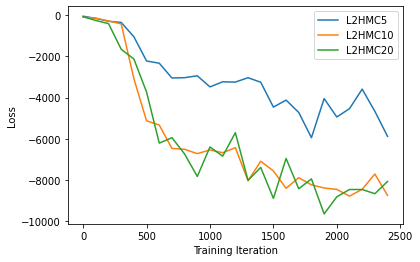

In [ ]:
xaxis = 100 * np.arange(25)
plt.plot(xaxis, l2hmc5.item().get("loss"), label='L2HMC5')
plt.plot(xaxis, l2hmc10.item().get("loss"), label='L2HMC10')
plt.plot(xaxis, l2hmc20.item().get("loss"), label='L2HMC20')
plt.xlabel('Training Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

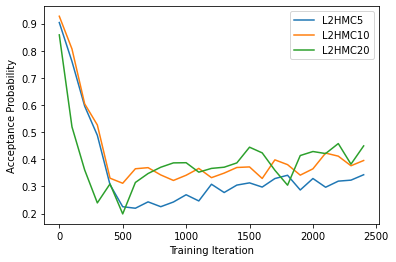

In [ ]:
xaxis = 100 * np.arange(25)
plt.plot(xaxis, l2hmc5.item().get("acceptance"), label='L2HMC5')
plt.plot(xaxis, l2hmc10.item().get("acceptance"), label='L2HMC10')
plt.plot(xaxis, l2hmc20.item().get("acceptance"), label='L2HMC20')
plt.xlabel('Training Iteration')
plt.ylabel('Acceptance Probability')
plt.legend()
plt.show()

In [ ]:
print('Training Time L2HMC5: %.2e -- Training Time L2HMC10: %.2e -- Training Time L2HMC20: %.2e' % (l2hmc5.item().get("training_time"), l2hmc10.item().get("training_time"), l2hmc20.item().get("training_time")))

Training Time L2HMC5: 6.51e+02 -- Training Time L2HMC10: 5.97e+02 -- Training Time L2HMC20: 5.95e+02


Loss and acceptance for sampler trained on rotated distributions (width 20)

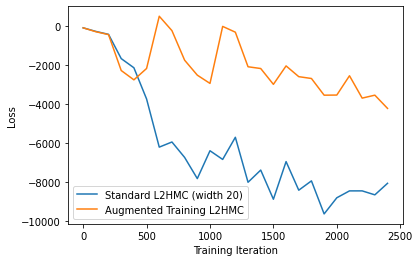

In [ ]:
xaxis = 100 * np.arange(25)
plt.plot(xaxis, l2hmc20.item().get("loss"), label='Standard L2HMC (width 20)')
plt.plot(xaxis, rotation20.item().get("loss"), label='Augmented Training L2HMC')
plt.xlabel('Training Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

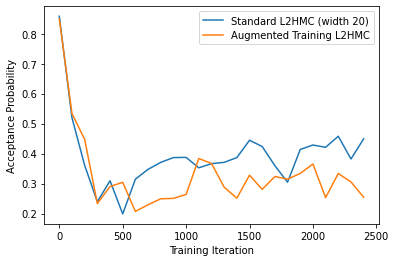

In [ ]:
xaxis = 100 * np.arange(25)
plt.plot(xaxis, l2hmc20.item().get("acceptance"), label='Standard L2HMC (width 20)')
plt.plot(xaxis, rotation20.item().get("acceptance"), label='Augmented Training L2HMC')
plt.xlabel('Training Iteration')
plt.ylabel('Acceptance Probability')
plt.legend()
plt.show()

## Autocorrelation
Plotting the **auto-correlation** of different networks

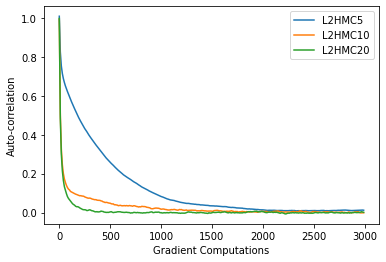

In [ ]:
xaxis = 10 * np.arange(300)
plt.plot(xaxis, l2hmc5.item().get("acl")[:300]/10000, label='L2HMC5')
plt.plot(xaxis, l2hmc10.item().get("acl")[:300]/10000, label='L2HMC10')
plt.plot(xaxis, l2hmc20.item().get("acl")[:300]/10000, label='L2HMC20')
plt.ylabel('Auto-correlation')
plt.xlabel('Gradient Computations')
plt.legend()
plt.show()

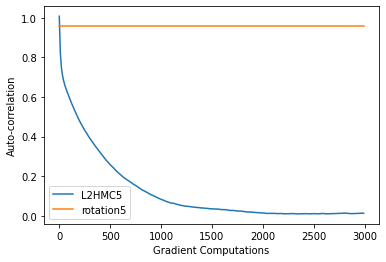

In [ ]:
xaxis = 10 * np.arange(300)
plt.plot(xaxis, l2hmc5.item().get("acl")[:300]/10000, label='L2HMC5')
plt.plot(xaxis, rotation5.item().get("acl")[:300]/10000, label='rotation5')
plt.ylabel('Auto-correlation')
plt.xlabel('Gradient Computations')
plt.legend()
plt.show()

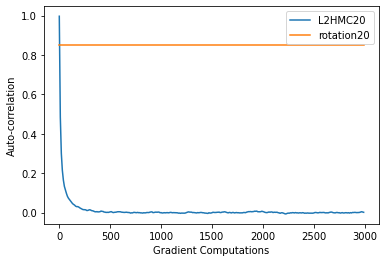

In [ ]:
xaxis = 10 * np.arange(300)
plt.plot(xaxis, l2hmc20.item().get("acl")[:300]/10000, label='L2HMC20')
plt.plot(xaxis, rotation20.item().get("acl")[:300]/10000, label='rotation20')
plt.ylabel('Auto-correlation')
plt.xlabel('Gradient Computations')
plt.legend()
plt.show()

## ESS
Printing the **Effective Sample Size** (ESS).

In [ ]:
print('ESS L2HMC5: %.2e -- ESS L2HMC10: %.2e -- ESS L2HMC20: %.2e' % (l2hmc5.item().get("ess"), l2hmc10.item().get("ess"), l2hmc20.item().get("ess")))

ESS L2HMC5: 9.87e-07 -- ESS L2HMC10: 4.38e-06 -- ESS L2HMC20: 7.67e-06


Printing the time to sample

In [ ]:
print('Sample Time L2HMC5: %.2e -- Sample Time L2HMC10: %.2e -- Sample Time L2HMC20: %.2e' % (l2hmc5.item().get("sample_time"), l2hmc10.item().get("sample_time"), l2hmc20.item().get("sample_time")))

Sample Time L2HMC5: 6.90e+01 -- Sample Time L2HMC10: 6.15e+01 -- Sample Time L2HMC20: 6.14e+01


Printing the **Effective Sample Size/Second** (ESS/S).

In [ ]:
print('ESS/S L2HMC5: %.2e -- ESS/S L2HMC10: %.2e -- ESS/S L2HMC20: %.2e' % (l2hmc5.item().get("ess")/l2hmc5.item().get("sample_time"), l2hmc10.item().get("ess")/l2hmc10.item().get("sample_time"), l2hmc20.item().get("ess")/l2hmc20.item().get("sample_time")))

ESS/S L2HMC5: 1.43e-08 -- ESS/S L2HMC10: 7.13e-08 -- ESS/S L2HMC20: 1.25e-07


Printing **Effective Sample Size** for Samplers tested on rotated distributions

In [22]:
print('ESS Width10 0 degree: %.2e -- ESS Width10 2 degree: %.2e -- ESS Width10 4 degree: %.2e -- ESS Width10 6 degree: %.2e -- ESS Width10 8 degree: %.2e' 
      % (invariant10.item().get("ess1"), invariant10.item().get("ess2"), invariant10.item().get("ess3"), invariant10.item().get("ess4"), invariant10.item().get("ess5")))

ESS Width10 0 degree: 2.99e-01 -- ESS Width10 2 degree: 1.58e-01 -- ESS Width10 4 degree: 9.24e-02 -- ESS Width10 6 degree: 5.26e-02 -- ESS Width10 8 degree: 3.07e-02


In [23]:
print('ESS Width20 0 degree: %.2e -- ESS Width20 2 degree: %.2e -- ESS Width20 4 degree: %.2e -- ESS Width20 6 degree: %.2e -- ESS Width20 8 degree: %.2e' 
      % (invariant20.item().get("ess1"), invariant20.item().get("ess2"), invariant20.item().get("ess3"), invariant20.item().get("ess4"), invariant20.item().get("ess5")))

ESS Width20 0 degree: 3.15e-01 -- ESS Width20 2 degree: 2.13e-01 -- ESS Width20 4 degree: 1.17e-01 -- ESS Width20 6 degree: 2.60e-02 -- ESS Width20 8 degree: 7.31e-03


In [24]:
print('ESS Width40 0 degree: %.2e -- ESS Width40 2 degree: %.2e -- ESS Width40 4 degree: %.2e -- ESS Width40 6 degree: %.2e -- ESS Width40 8 degree: %.2e' 
      % (invariant40.item().get("ess1"), invariant40.item().get("ess2"), invariant40.item().get("ess3"), invariant40.item().get("ess4"), invariant40.item().get("ess5")))

ESS Width40 0 degree: 3.07e-01 -- ESS Width40 2 degree: 4.89e-02 -- ESS Width40 4 degree: 7.34e-03 -- ESS Width40 6 degree: 3.13e-04 -- ESS Width40 8 degree: 2.46e-04


## Samples
We can visualize a single chain of L2HMC for $50$ time steps.

In [6]:
mu = np.zeros(2,)
cov = np.array([[50.05, -49.95], [-49.95, 50.05]])
distribution = Gaussian(mu, cov)
S = distribution.get_samples(200)

Plot of samples from l2hmc samplers of network with 5, 10, and 20

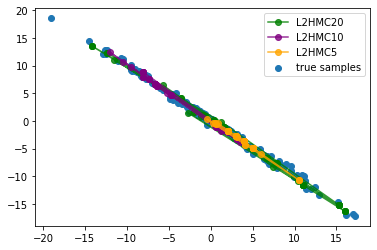

In [ ]:
samples_5 = l2hmc5.item().get("samples")
samples_10 = l2hmc10.item().get("samples")
samples_20 = l2hmc20.item().get("samples")

plt.scatter(S[:, 0], S[:, 1], label='true samples')
plt.plot(samples_20[:50, 1, 0], samples_20[:50, 1, 1], color='green', marker='o', alpha=0.8, label='L2HMC20')
plt.plot(samples_10[:50, 1, 0], samples_10[:50, 1, 1], color='purple', marker='o', alpha=0.8, label='L2HMC10')
plt.plot(samples_5[:50, 1, 0], samples_5[:50, 1, 1], color='orange', marker='o', alpha=0.8, label='L2HMC5')
plt.legend()
plt.show()

Plot of samples from standard l2hmc training vs training on rotated distributions (width 20)

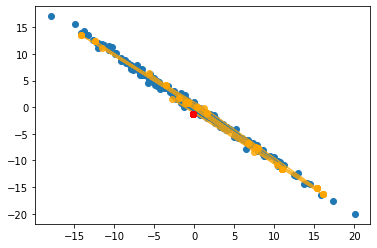

In [12]:
samples_normal = l2hmc20.item().get("samples")
samples_degenerate = rotation20.item().get("samples")

plt.scatter(S[:, 0], S[:, 1])
plt.plot(samples_normal[:50, 1, 0], samples_normal[:50, 1, 1], color='orange', marker='o', alpha=0.8)
plt.plot(samples_degenerate[:50, 1, 0], samples_degenerate[:50, 1, 1], color='red', marker='o', alpha=0.8)
plt.show()